<a href="https://colab.research.google.com/github/joybratas1/Credit-Card-Fraud-Project/blob/main/Feature_Selection_steps_CCFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # counter takes values returns value_counts dictionary
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import os

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
url_l='https://www.kaggle.com/mlg-ulb/creditcardfraud'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


  0%|          | 0.00/66.0M [00:00<?, ?B/s]

100%|██████████| 66.0M/66.0M [00:01<00:00, 61.8MB/s]


In [ ]:
file_name='/content/creditcardfraud/creditcard.csv'

In [ ]:
df= pd.read_csv(file_name)
df.dataframeName = 'European Credit card Fraud data.csv'
nRow, nCol = df.shape
print('There are {} rows and {} columns in our Dataset'.format(nRow,nCol))

There are 284807 rows and 31 columns in our Dataset


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_memory(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94812.664062,-0.000062,0.000028,NaN,0.000053,0.000163,-0.000033,0.000001,-0.000022,-0.000013,0.000019,0.000021,0.000016,0.000031,0.000010,0.000035,2.384186e-07,0.000044,-0.000005,0.000013,4.768372e-07,0.000008,-0.000054,0.000011,0.000004,0.000068,-0.000007,-7.152557e-07,2.384186e-07,NaN,0.001727
std,47487.195312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.035645e-01,3.300781e-01,NaN,0.041527
min,0.000000,-56.406250,-72.687500,-48.312500,-5.683594,-113.750000,-26.156250,-43.562500,-73.187500,-13.437500,-24.593750,-4.796875,-18.687500,-5.792969,-19.218750,-4.500000,-1.413281e+01,-25.156250,-9.500000,-7.214844,-5.450000e+01,-34.843750,-10.929688,-44.812500,-2.835938,-10.296875,-2.605469,-2.256250e+01,-1.542969e+01,0.000000,0.000000
25%,54201.500000,-0.920410,-0.598633,-0.890137,-0.848633,-0.691406,-0.768066,-0.554199,-0.208618,-0.643066,-0.535645,-0.762695,-0.405518,-0.648438,-0.425537,-0.583008,-4.680176e-01,-0.483643,-0.498779,-0.456299,-2.116699e-01,-0.228394,-0.542480,-0.161865,-0.354492,-0.317139,-0.326904,-7.086182e-02,-5.294800e-02,5.601562,0.000000
50%,84692.000000,0.018112,0.065491,0.179810,-0.019852,-0.054321,-0.274170,0.040100,0.022354,-0.051422,-0.092896,-0.032745,0.140015,-0.013565,0.050598,0.048065,6.640625e-02,-0.065674,-0.003635,0.003735,-6.246948e-02,-0.029449,0.006783,-0.011192,0.040985,0.016586,-0.052124,1.341820e-03,1.124573e-02,22.000000,0.000000
75%,139320.500000,1.315430,0.803711,1.027344,0.743164,0.611816,0.398682,0.570312,0.327393,0.597168,0.453857,0.739746,0.618164,0.662598,0.493164,0.648926,5.234375e-01,0.399658,0.500977,0.458984,1.330566e-01,0.186401,0.528320,0.147583,0.439453,0.350830,0.240967,9.106445e-02,7.830811e-02,77.187500,0.000000
max,172792.000000,2.455078,22.062500,9.382812,16.875000,34.812500,73.312500,120.562500,20.000000,15.593750,23.750000,12.015625,7.847656,7.125000,10.523438,8.875000,1.731250e+01,9.250000,5.042969,5.593750,3.940625e+01,27.203125,10.500000,22.531250,4.585938,7.519531,3.517578,3.160938e+01,3.384375e+01,25696.000000,1.000000


In [37]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173966e-01,-1.059386e-02,-4.196158e-01,-1.052602e-01,1.730723e-01,-6.301569e-02,8.471457e-02,-3.695025e-02,-8.661346e-03,3.061647e-02,-2.476896e-01,1.243487e-01,-6.590148e-02,-9.875604e-02,-1.834527e-01,1.190260e-02,-7.329690e-02,9.043759e-02,2.897562e-02,-5.086558e-02,4.473570e-02,1.440578e-01,5.114226e-02,-1.618170e-02,-2.330827e-01,-4.140648e-02,-5.133451e-03,-9.412160e-03,-0.010596,-0.012323
V1,0.117397,1.000000e+00,-1.112393e-07,7.008953e-06,-2.180993e-06,4.549533e-06,-1.019140e-06,2.178623e-06,-1.520636e-06,7.745853e-07,1.703908e-06,-1.435543e-06,-3.161651e-07,-9.773863e-09,2.950044e-06,2.539719e-07,1.611774e-06,1.012098e-06,1.131462e-06,1.046430e-06,2.798551e-06,1.233829e-06,3.446954e-06,9.401318e-06,-3.941533e-07,1.924782e-06,4.414856e-07,-3.995493e-06,5.262035e-06,-0.227713,-0.101348
V2,-0.010594,-1.112393e-07,1.000000e+00,-3.078784e-06,1.751105e-06,3.805664e-07,-1.919690e-06,-6.485411e-07,-1.970317e-06,-7.965476e-07,-2.868107e-06,1.016257e-06,-1.027289e-06,-2.327094e-07,-1.367525e-06,3.470079e-07,-2.136910e-06,-2.749514e-06,-1.029321e-06,-2.977197e-07,4.338788e-06,2.074810e-06,-2.705048e-06,6.514719e-06,-4.964027e-07,1.147010e-06,-8.943206e-07,4.664764e-06,1.385259e-06,-0.531405,0.091291
V3,-0.419616,7.008953e-06,-3.078784e-06,1.000000e+00,-1.478797e-06,3.339118e-06,1.261018e-07,1.044687e-05,-6.277743e-06,3.982830e-07,8.268171e-07,-6.394558e-07,1.886818e-07,-5.742658e-07,3.575047e-06,-2.984010e-07,4.794385e-06,1.319697e-06,1.467008e-06,5.007630e-08,1.121941e-06,1.765072e-06,3.724977e-06,1.206940e-06,-3.440800e-07,-4.042681e-08,-2.146131e-07,-8.696855e-07,-1.589571e-06,-0.210879,-0.192962
V4,-0.105260,-2.180993e-06,1.751105e-06,-1.478797e-06,1.000000e+00,-3.429088e-07,2.153832e-06,-3.571908e-06,1.959925e-06,-7.346730e-07,-3.243570e-07,1.032136e-06,-6.380747e-07,-3.536948e-08,-1.218897e-06,4.775727e-08,-2.319529e-06,-1.189529e-06,-9.582311e-07,7.149099e-07,6.960228e-08,-9.191688e-07,1.389861e-07,-1.734143e-06,-2.573497e-07,2.715924e-07,-3.535668e-07,-4.176400e-07,3.005353e-07,0.098732,0.133450
V5,0.173072,4.549533e-06,3.805664e-07,3.339118e-06,-3.429088e-07,1.000000e+00,-5.105982e-06,8.298852e-06,-4.221445e-06,3.864682e-07,2.712246e-06,-1.678225e-06,3.342028e-07,1.663050e-07,3.237135e-06,9.453716e-07,3.921073e-06,-3.040452e-07,-1.046672e-06,8.850301e-07,1.282452e-06,3.774475e-06,1.878910e-06,-2.779055e-06,-1.906704e-06,2.842979e-07,-4.800834e-07,9.755467e-07,-2.056797e-06,-0.386358,-0.094974
V6,-0.063016,-1.019140e-06,-1.919690e-06,1.261018e-07,2.153832e-06,-5.105982e-06,1.000000e+00,-3.108663e-07,1.326054e-06,-2.174231e-06,6.770627e-07,7.783236e-07,-6.101954e-07,-5.656942e-07,-1.230174e-06,-1.216788e-06,-1.659585e-07,4.375169e-09,4.342874e-07,-4.189999e-07,-4.196087e-06,-2.856575e-07,-2.583273e-06,3.196928e-07,4.576558e-07,1.028714e-06,-3.110540e-07,1.118882e-07,4.817306e-07,0.215985,-0.043642
V7,0.084715,2.178623e-06,-6.485411e-07,1.044687e-05,-3.571908e-06,8.298852e-06,-3.108663e-07,1.000000e+00,-1.085786e-06,9.014359e-07,4.055458e-06,-1.735138e-06,3.456862e-06,-1.144208e-06,5.198175e-06,-1.323951e-06,1.402715e-06,4.550341e-06,1.960725e-06,-1.368634e-06,-1.988202e-07,5.036131e-06,2.023177e-06,3.755570e-06,-2.120853e-08,-2.337082e-08,4.977541e-07,-1.061273e-05,2.441307e-06,0.397302,-0.187262
V8,-0.036950,-1.520636e-06,-1.970317e-06,-6.277743e-06,1.959925e-06,-4.221445e-06,1.326054e-06,-1.085786e-06,1.000000e+00,-5.900829e-09,-6.305132e-07,5.486232e-07,-1.641372e-06,-1.200133e-07,-5.150214e-06,-4.241268e-07,-1.800495e-06,-3.050821e-07,-2.047111e-06,-9.595121e-08,3.417485e-06,5.426244e-06,5.713532e-06,9.375476e-07,-5.046462e-07,-4.220161e-07,1.204087e-06,3.775128e-06,8.225930e-07,-0.103078,0.019881
V9,-0.008661,7.745853e-07,-7.965476e-07,3.982830e-07,-7.346730e-07,3.864682e-07,-2.174231e-06,9.014359e-07,-5.900829e-09,1.000000e+00,-8.269634e-07,1.713292e-08,2.389871e-07,6.435872e-07,5

In [ ]:
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
#vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})

print('No Frauds Cases are ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[0,1])
print('Frauds Cases are', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[1,1])

No Frauds Cases are  99.83 % of the dataset i.e. 284315
Frauds Cases are 0.17 % of the dataset i.e. 492


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



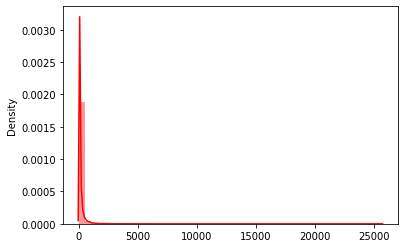

In [ ]:
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, color='r')
#ax.set_title('Distribution of Transaction Amount', fontsize=14)
#ax[0].set_xlim([min(amount_val), max(amount_val)])

In [ ]:
rst= df[df['Amount'].values > 5000]
len(rst)

55

In [50]:
len(rst[rst['Class'].values == 0])

55

Removing Outliers using **Winsorization**

In [57]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 0.1)
    q3 = np.percentile(df , 99.9)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(df['Amount'])
len(out)

Outliers: [3828.0, 7712.0, 3668.0, 4002.0, 3996.0, 4000.0, 6132.0, 3588.0, 3406.0, 5240.0, 3382.0, 7880.0, 3464.0, 3888.0, 7428.0, 3610.0, 4908.0, 4312.0, 4312.0, 4104.0, 3106.0, 4140.0, 3450.0, 3076.0, 3526.0, 3056.0, 3024.0, 3980.0, 3078.0, 3336.0, 4476.0, 3202.0, 3208.0, 3208.0, 4340.0, 6952.0, 4000.0, 3822.0, 4456.0, 3418.0, 3180.0, 3820.0, 6668.0, 3604.0, 4276.0, 3680.0, 3466.0, 12912.0, 4584.0, 3424.0, 5116.0, 4008.0, 6512.0, 3500.0, 4628.0, 5680.0, 4024.0, 3200.0, 4112.0, 3050.0, 11896.0, 5132.0, 3684.0, 4080.0, 5936.0, 7636.0, 3254.0, 19664.0, 3168.0, 3118.0, 5448.0, 5340.0, 4276.0, 4276.0, 3468.0, 3616.0, 3546.0, 3292.0, 3208.0, 4900.0, 5656.0, 3318.0, 4248.0, 3034.0, 3692.0, 3348.0, 4652.0, 3938.0, 3114.0, 3882.0, 3728.0, 3386.0, 5260.0, 8792.0, 3692.0, 3042.0, 4112.0, 3770.0, 5316.0, 3606.0, 3516.0, 3170.0, 4280.0, 3850.0, 3364.0, 4336.0, 4352.0, 4100.0, 6000.0, 3480.0, 3106.0, 4002.0, 3804.0, 3930.0, 3746.0, 3308.0, 6240.0, 4064.0, 3232.0, 3210.0, 5304.0, 3152.0, 3032.0, 47

284

In [129]:
#df.loc[df.apply(lambda x: x.Amount in out, axis=1)]
x= df[~df['Amount'].isin(out)]     #To get only the columns with removed Amount Outliers

In [130]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359375,-0.072754,2.537109,1.377930,-0.338379,0.462402,0.239624,0.098694,0.363770,0.090820,-0.551758,-0.617676,-0.991211,-0.311279,1.467773,-0.470459,0.208008,0.025787,0.404053,0.251465,-0.018311,0.277832,-0.110474,0.066956,0.128540,-0.189087,0.133545,-0.021057,149.625000,0
1,0.0,1.191406,0.266113,0.166504,0.448242,0.060028,-0.082336,-0.078796,0.085083,-0.255371,-0.166992,1.612305,1.065430,0.489014,-0.143799,0.635742,0.463867,-0.114807,-0.183350,-0.145752,-0.069092,-0.225830,-0.638672,0.101318,-0.339844,0.167114,0.125854,-0.008980,0.014725,2.689453,0
2,1.0,-1.358398,-1.339844,1.773438,0.379883,-0.503418,1.800781,0.791504,0.247681,-1.514648,0.207642,0.624512,0.066101,0.717285,-0.165894,2.345703,-2.890625,1.110352,-0.121338,-2.261719,0.524902,0.248047,0.771484,0.909180,-0.689453,-0.327637,-0.139038,-0.055359,-0.059753,378.750000,0
3,1.0,-0.966309,-0.185181,1.792969,-0.863281,-0.010307,1.247070,0.237549,0.377441,-1.386719,-0.054962,-0.226440,0.178223,0.507812,-0.287842,-0.631348,-1.059570,-0.684082,1.965820,-1.232422,-0.208008,-0.108276,0.005272,-0.190308,-1.175781,0.647461,-0.221924,0.062744,0.061462,123.500000,0
4,2.0,-1.158203,0.877930,1.548828,0.403076,-0.407227,0.095947,0.592773,-0.270508,0.817871,0.752930,-0.822754,0.538086,1.345703,-1.120117,0.175171,-0.451416,-0.237061,-0.038208,0.803711,0.408447,-0.009430,0.798340,-0.137451,0.141235,-0.206055,0.502441,0.219482,0.215210,70.000000,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



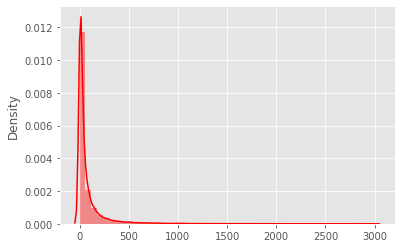

In [131]:
amount_val = x['Amount'].values
time_val = x['Time'].values

sns.distplot(amount_val, color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



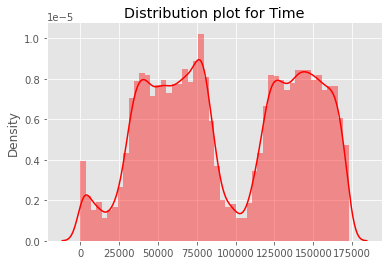

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



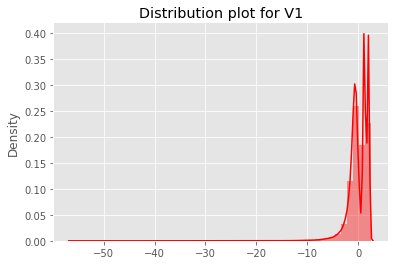

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



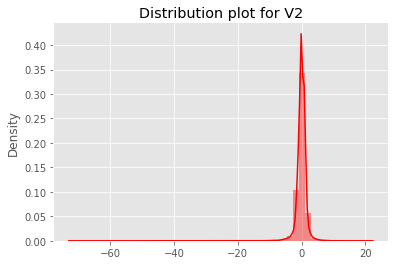

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



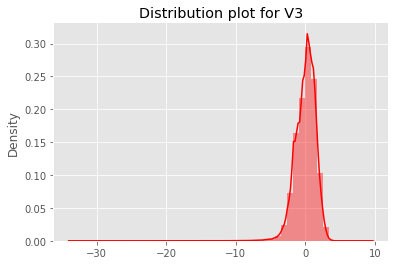

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



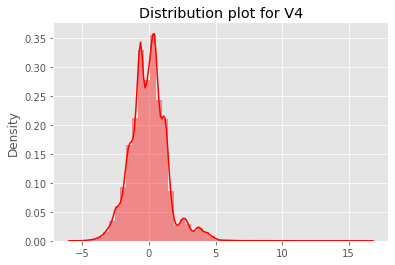

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



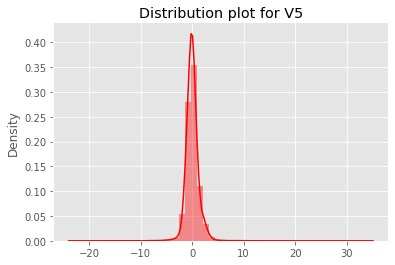

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



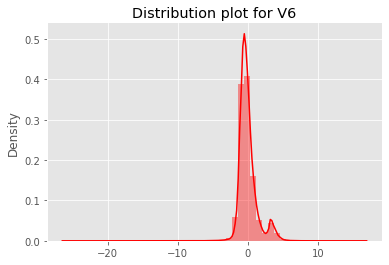

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



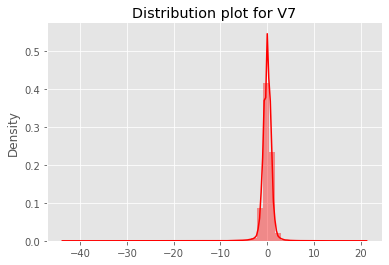

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



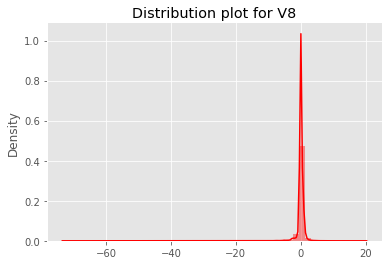

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



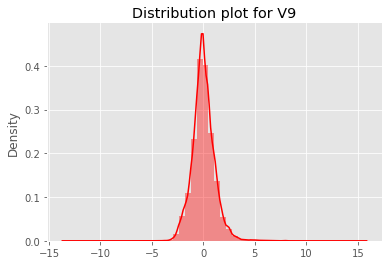

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



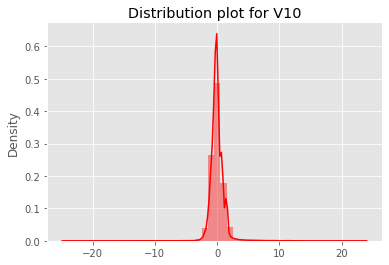

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



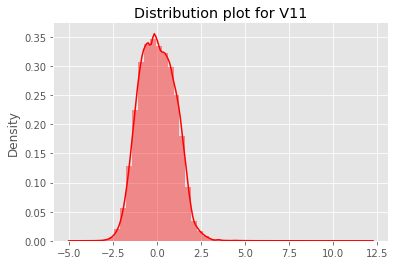

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



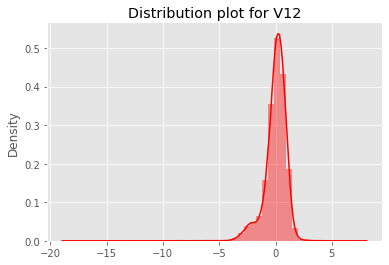

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



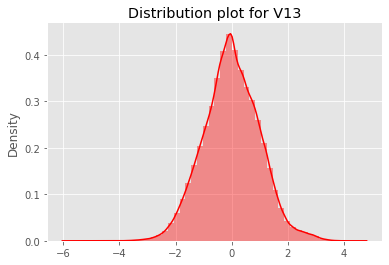

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



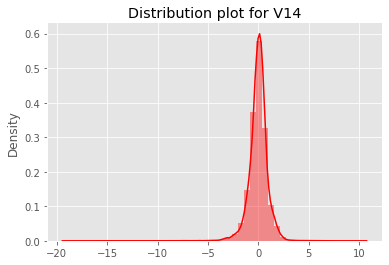

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



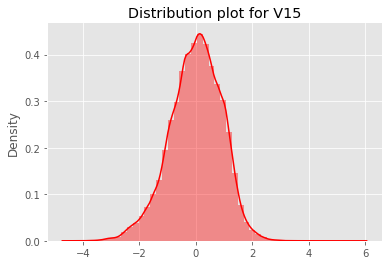

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



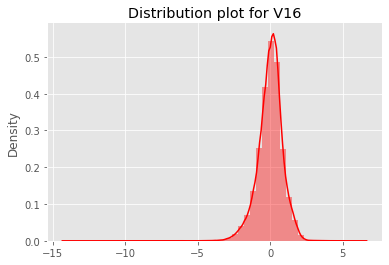

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



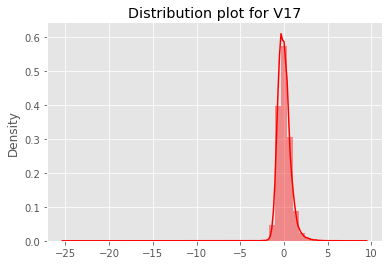

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



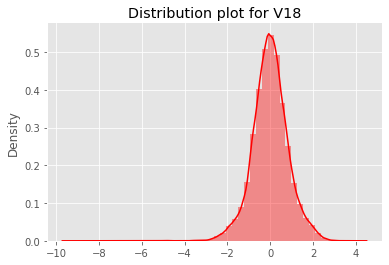

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



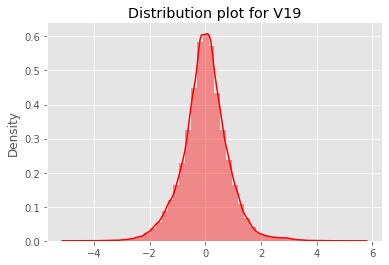

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



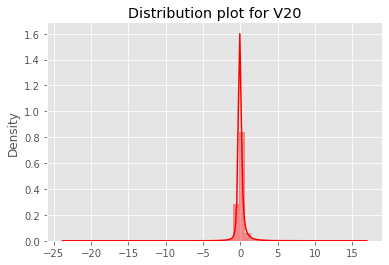

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



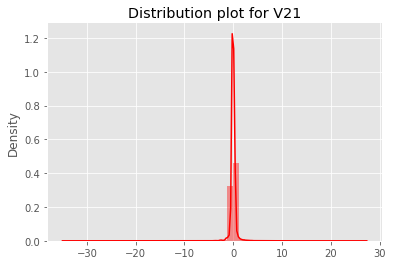

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



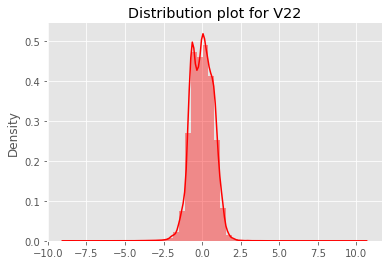

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



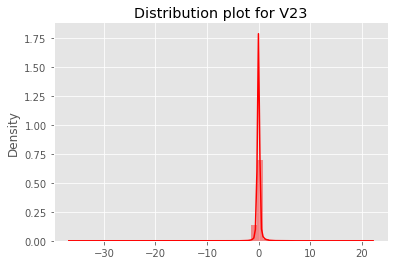

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



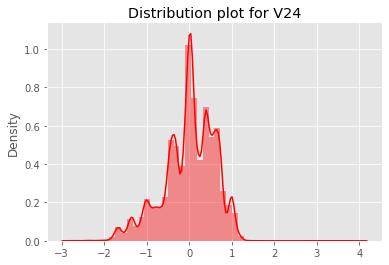

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



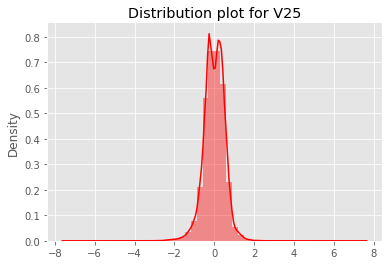

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



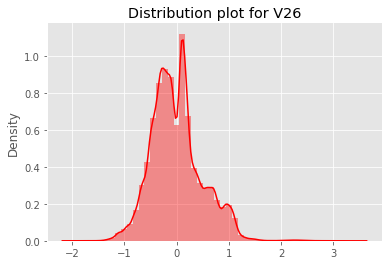

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



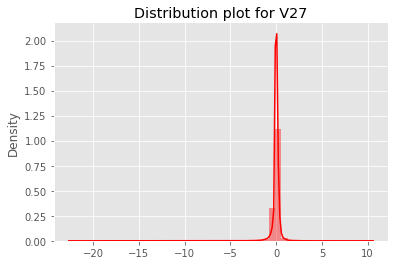

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



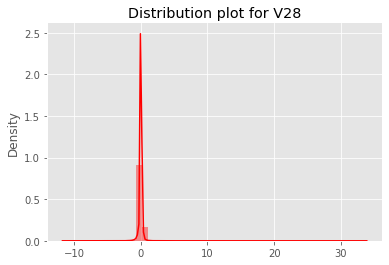

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



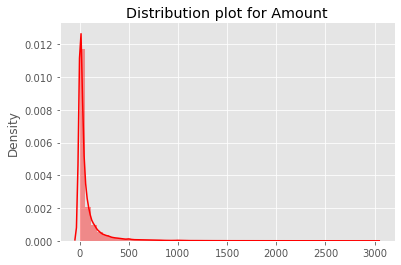

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



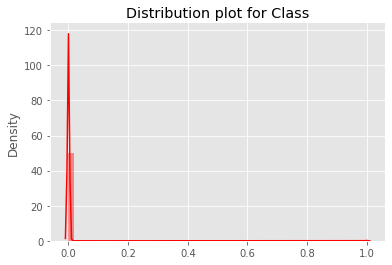

In [132]:
for c in [c for c in x.columns]:
  y=x[c].values
  sns.distplot(y, color='r')
  plt.title("Distribution plot for {}".format(c))
  sns.despine()
  plt.show()
          




SCALING 

In [136]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [139]:
x['scaled_amount'] = rob_scaler.fit_transform(x['Amount'].values.reshape(-1,1))
x['scaled_time'] = rob_scaler.fit_transform(x['Time'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359375,-0.072754,2.537109,1.377930,-0.338379,0.462402,0.239624,0.098694,0.363770,0.090820,-0.551758,-0.617676,-0.991211,-0.311279,1.467773,-0.470459,0.208008,0.025787,0.404053,0.251465,-0.018311,0.277832,-0.110474,0.066956,0.128540,-0.189087,0.133545,-0.021057,149.625000,0,1.788086,-0.995048
1,0.0,1.191406,0.266113,0.166504,0.448242,0.060028,-0.082336,-0.078796,0.085083,-0.255371,-0.166992,1.612305,1.065430,0.489014,-0.143799,0.635742,0.463867,-0.114807,-0.183350,-0.145752,-0.069092,-0.225830,-0.638672,0.101318,-0.339844,0.167114,0.125854,-0.008980,0.014725,2.689453,0,-0.270264,-0.995048
2,1.0,-1.358398,-1.339844,1.773438,0.379883,-0.503418,1.800781,0.791504,0.247681,-1.514648,0.207642,0.624512,0.066101,0.717285,-0.165894,2.345703,-2.890625,1.110352,-0.121338,-2.261719,0.524902,0.248047,0.771484,0.909180,-0.689453,-0.327637,-0.139038,-0.055359,-0.059753,378.750000,0,4.996094,-0.995036
3,1.0,-0.966309,-0.185181,1.792969,-0.863281,-0.010307,1.247070,0.237549,0.377441,-1.386719,-0.054962,-0.226440,0.178223,0.507812,-0.287842,-0.631348,-1.059570,-0.684082,1.965820,-1.232422,-0.208008,-0.108276,0.005272,-0.190308,-1.175781,0.647461,-0.221924,0.062744,0.061462,123.500000,0,1.421875,-0.995036
4,2.0,-1.158203,0.877930,1.548828,0.403076,-0.407227,0.095947,0.592773,-0.270508,0.817871,0.752930,-0.822754,0.538086,1.345703,-1.120117,0.175171,-0.451416,-0.237061,-0.038208,0.803711,0.408447,-0.009430,0.798340,-0.137451,0.141235,-0.206055,0.502441,0.219482,0.215210,70.000000,0,0.672363,-0.995024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.882812,10.070312,-9.835938,-2.066406,-5.363281,-2.607422,-4.917969,7.304688,1.914062,4.355469,-1.592773,2.712891,-0.689453,4.625000,-0.924316,1.107422,1.991211,0.510742,-0.683105,1.475586,0.213501,0.111877,1.014648,-0.509277,1.436523,0.250000,0.943848,0.823730,0.770020,0,-0.297119,1.035018
284803,172787.0,-0.732910,-0.055084,2.035156,-0.738770,0.868164,1.058594,0.024323,0.294922,0.584961,-0.976074,-0.150146,0.916016,1.214844,-0.675293,1.165039,-0.711914,-0.025696,-1.220703,-1.545898,0.059601,0.214233,0.924316,0.012466,-1.016602,-0.606445,-0.395264,0.068481,-0.053528,24.796875,0,0.039398,1.035030
284804,172788.0,1.919922,-0.301270,-3.250000,-0.557617,2.630859,3.031250,-0.296875,0.708496,0.432373,-0.484863,0.411621,0.063110,-0.183716,-0.510742,1.329102,0.140747,0.313477,0.395752,-0.577148,0.001396,0.232056,0.578125,-0.037506,0.640137,0.265625,-0.087341,0.004456,-0.026566,67.875000,0,0.642578,1.035041
284805,172788.0,-0.240479,0.530273,0.702637,0.689941,-0.377930,0.623535,-0.686035,0.679199,0.392090,-0.399170,-1.933594,-0.962891,-1.041992,0.449707,1.962891,-0.608398,0.509766,1.114258,2.898438,0.127441,0.265137,0.799805,-0.163330,0.123230,-0.569336,0.546875,0.108826,0.104553,10.000000,0,-0.167847,1.035041


FILTER METHOD- CHecking Correlation between the features

In [142]:
for i in range(0,len(x.columns)):
    for j in  range(0,len(x.columns)):
        if i!=j:
            corr_1=np.abs(x[x.columns[i]].corr(x[x.columns[j]]))
            if corr_1 <0.3:
                print( x.columns[i] , " is not correlated  with ", x.columns[j])
            elif corr_1>0.75:
                print( x.columns[i] , " is highly  correlated  with ", x.columns[j])

Time  is not correlated  with  V1
Time  is not correlated  with  V2
Time  is not correlated  with  V4
Time  is not correlated  with  V5
Time  is not correlated  with  V6
Time  is not correlated  with  V7
Time  is not correlated  with  V8
Time  is not correlated  with  V9
Time  is not correlated  with  V10
Time  is not correlated  with  V11
Time  is not correlated  with  V12
Time  is not correlated  with  V13
Time  is not correlated  with  V14
Time  is not correlated  with  V15
Time  is not correlated  with  V16
Time  is not correlated  with  V17
Time  is not correlated  with  V18
Time  is not correlated  with  V19
Time  is not correlated  with  V20
Time  is not correlated  with  V21
Time  is not correlated  with  V22
Time  is not correlated  with  V23
Time  is not correlated  with  V24
Time  is not correlated  with  V25
Time  is not correlated  with  V26
Time  is not correlated  with  V27
Time  is not correlated  with  V28
Time  is not correlated  with  Amount
Time  is not correlated  

We dont find any correlated Feature. (Scaled Values are correlated but that was obvious we will use only the scaled value and not the row Time and Amount)